In [1]:
from HMM import unsupervised_HMM
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission
)

## 3 - Pre-processing

In [2]:
from Utility import get_poem_sequence
obs, obs_map = get_poem_sequence('data/shakespeare.txt', 'line')

print(obs[:4])
print(obs_map['cruel_2'])

[[0, 1, 2, 3, 4, 5], [6, 7, 8, 9, 10, 11, 12], [13, 14, 15, 16, 17, 18, 19, 20], [21, 22, 23, 10, 24, 21, 25]]
1789


## 5 - Poetry generation, part I - HMM (from HW6)

In [4]:
hmm5 = unsupervised_HMM(obs[:140], 5, 100, 2019)

iteration 0
iteration 10
iteration 20
iteration 30
iteration 40
iteration 50
iteration 60
iteration 70
iteration 80
iteration 90


In [5]:
print('Sample Sentence:\n====================')
print(sample_sentence(hmm5, obs_map, n_words=8))

Sample Sentence:
Mutual_2 resembling_3 sap_1 then_1 on_1 unlooked_2 the_1 ornament_3...


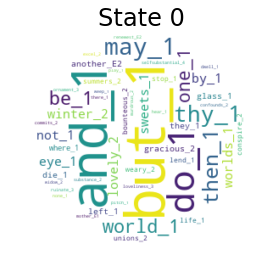

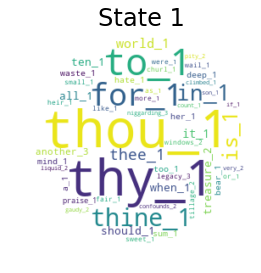

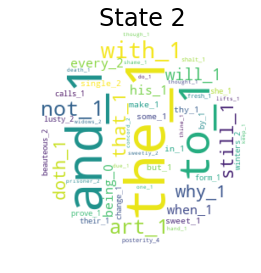

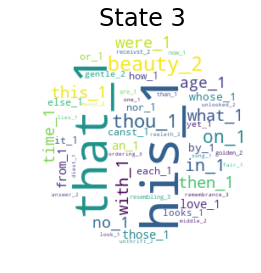

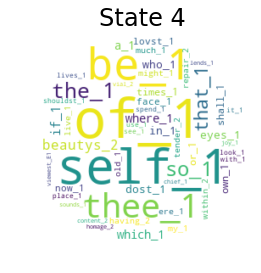

In [6]:
wordclouds = states_to_wordclouds(hmm5, obs_map)

## 6 - Poetry generation, part II - RNN